In [43]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
from math import sqrt
import ROOT
import ctypes
try:
#     plt.style.use('belle2')
    plt.style.use('belle2_serif')
#     plt.style.use('belle2_modern')
except OSError:
    print("Please install belle2 matplotlib style") 
px = 1/plt.rcParams['figure.dpi']

from main.data_tools.extract_ntuples import get_pd, get_np
from main.draw_tools.decorations import b2helix, watermark
from main.draw_tools.stacking_with_error_bars import MC_stack_plot, MC_stack_plot_density

from main.data_tools.error_bars import make_data_weight
from main.data_tools.query_dataframes import cut_dfs_7types

from matplotlib.ticker import ScalarFormatter


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [44]:
def cal_Br_Central_value(Nsig, Nref, eff_sig, eff_ref, Br_ref_dec):
    print("Input values:")
    print("Nsig:", Nsig)
    print("Nref:", Nref)
    print("eff_sig:", eff_sig)
    print("eff_ref:", eff_ref)
    print("Br_ref_dec:", Br_ref_dec)
    
    N_real_sig = Nsig / eff_sig
    N_real_ref = Nref / eff_ref
    
    Br = Br_ref_dec * (N_real_sig / N_real_ref)
    
    return Br
    
from math import sqrt

def cal_Br_error_stat(Nsig_err, Nsig, Nref_err, Nref, central_value):
    Variance = (Nsig_err / Nsig)**2 + (Nref_err / Nref)**2
    TOTAL = sqrt(Variance) * central_value
    return TOTAL

def cal_Br_error_with_eff(Nsig_err, Nsig, Nref_err, Nref, eff_sig_err, eff_sig, eff_ref_err, eff_ref, central_value):
    Variance = (Nsig_err / Nsig)**2 + (eff_sig_err / eff_sig)**2 + (Nref_err / Nref)**2 + (eff_ref_err / eff_ref)**2
    TOTAL = sqrt(Variance) * central_value
    return TOTAL


In [45]:
from math import sqrt

# Function to calculate the central branching ratio value
def calculate_br(Nsig, Nref, eff_sig, eff_ref, Br_ref_dec):
    N_real_sig = Nsig / eff_sig
    N_real_ref = Nref / eff_ref
    Br = Br_ref_dec * (N_real_sig / N_real_ref)
    return Br

# Function to calculate statistical uncertainty
def calculate_stat_uncertainty(Nsig_err, Nsig, Nref_err, Nref, central_value):
    variance = (Nsig_err / Nsig)**2 + (Nref_err / Nref)**2
    return sqrt(variance) * central_value

# Function to print results in a formatted way
def print_results(label, central_value, stat_unc, Br_sig_dec):
    pull = (central_value - Br_sig_dec) / stat_unc
    print(f'{label} Central value = {central_value:.4e}')
    print(f'{label} Statistical uncertainty = {stat_unc:.4e}')
    print(f'{label} Pull = {pull:.4f}')
    print(f'{label} stas. unc./Central value = {stat_unc/central_value:.4e}\n')

# Error-weighted combination function
def combine_error_weighted(x, y, x_err, y_err):
    central_value = (x / x_err**2 + y / y_err**2) / (1 / x_err**2 + 1 / y_err**2)
    error = 1 / sqrt(1 / x_err**2 + 1 / y_err**2)
    return central_value, error

In [46]:
# signal_eff_error = math.sqrt(signal_eff * (1 - signal_eff) / N_gen)

def calculate_sig_eff_err(eff, N_gen):

    error = math.sqrt(eff * (1 - eff) / N_gen)
    return error

# Br(D+ -> eta K+)

In [47]:
# Constants
Br_ref_dec = 0.003770000
Br_sig_dec = 0.000125000

Br_sig_PDG = 0.0001250000
Br_sig_PDG_err = 0.0000160000

In [48]:

eff_sig_cal = 0.035818
# eff_sig_err_cal = calculate_sig_eff_err(0.04065, 2e+6)

eff_sig_err_cal = calculate_sig_eff_err(eff_sig_cal, 6e+6)

eff_sig_err_cal

eff_ref_cal = 0.053365

eff_ref_err_cal = calculate_sig_eff_err(eff_ref_cal, 6e+6)
eff_ref_err_cal

print(f"signal eff error: {eff_sig_err_cal:.6e}, ref eff error: {eff_ref_err_cal:.6e}")

signal eff error: 7.586729e-05, ref eff error: 9.175799e-05


In [49]:
# First calculation for mode: eta -> gg
Nsig_err, Nsig, Nref_err, Nref = 35.21465445, 431.129888013, 183.09397588339016, 19096.708690420874

eff_sig_err, eff_sig, eff_ref_err, eff_ref = eff_sig_err_cal, eff_sig_cal, eff_ref_err_cal, eff_ref_cal

central_value_1 = calculate_br(Nsig, Nref, eff_sig, eff_ref, Br_ref_dec)
stat_unc_1 = calculate_stat_uncertainty(Nsig_err, Nsig, Nref_err, Nref, central_value_1)
print_results("Mode: eta -> gg", central_value_1, stat_unc_1, Br_sig_dec)


Mode: eta -> gg Central value = 1.2681e-04
Mode: eta -> gg Statistical uncertainty = 1.0429e-05
Mode: eta -> gg Pull = 0.1734
Mode: eta -> gg stas. unc./Central value = 8.2241e-02



In [50]:

# eff_sig_cal = 0.03811
# eff_sig_cal = 0.033
eff_sig_cal = 0.026379

# eff_sig_err_cal = calculate_sig_eff_err(0.03877, 2e+6)
eff_sig_err_cal = calculate_sig_eff_err(eff_sig_cal, 6e+6)

eff_ref_cal = 0.038297

eff_ref_err_cal = calculate_sig_eff_err(eff_ref_cal, 6e+6)

print(f"signal eff error: {eff_sig_err_cal:.6e}, ref eff error: {eff_ref_err_cal:.6e}")

signal eff error: 6.542572e-05, ref eff error: 7.834788e-05


In [51]:
# Second calculation for mode: eta -> pipipi
Nsig_err, Nsig, Nref_err, Nref = 18.3065450243, 183.968662081, 98.01854442095419, 7675.473504052207
eff_sig_err, eff_sig, eff_ref_err, eff_ref = eff_sig_err_cal, eff_sig_cal ,eff_ref_err_cal,eff_ref_cal

central_value_2 = calculate_br(Nsig, Nref, eff_sig, eff_ref, Br_ref_dec)
stat_unc_2 = calculate_stat_uncertainty(Nsig_err, Nsig, Nref_err, Nref, central_value_2)
print_results("Mode: eta -> pipipi", central_value_2, stat_unc_2, Br_sig_dec)

Mode: eta -> pipipi Central value = 1.3119e-04
Mode: eta -> pipipi Statistical uncertainty = 1.3161e-05
Mode: eta -> pipipi Pull = 0.4700
Mode: eta -> pipipi stas. unc./Central value = 1.0033e-01



In [52]:
# Combined error-weighted result
combined_central_value, combined_error = combine_error_weighted(central_value_1, central_value_2, stat_unc_1, stat_unc_2)
print_results("Combined", combined_central_value, combined_error, Br_sig_dec)

Combined Central value = 1.2850e-04
Combined Statistical uncertainty = 8.1738e-06
Combined Pull = 0.4278
Combined stas. unc./Central value = 6.3611e-02



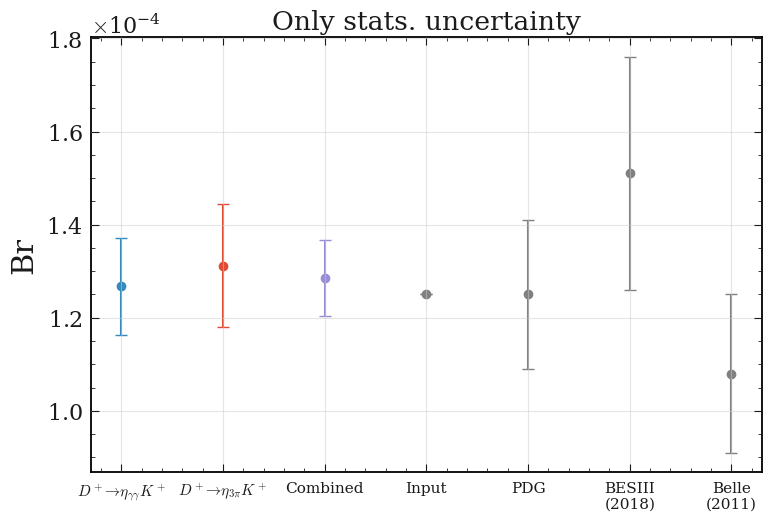

In [53]:
# Plotting
plt.errorbar(1, central_value_1, yerr=stat_unc_1, fmt='o', capsize=4)
plt.errorbar(2, central_value_2, yerr=stat_unc_2, fmt='o', capsize=4)
plt.errorbar(3, combined_central_value, yerr=combined_error, fmt='o', capsize=4)
plt.errorbar(4, Br_sig_dec, yerr=0, fmt='o', capsize=4, label='Input',color='gray')
plt.errorbar(5, Br_sig_PDG, yerr=Br_sig_PDG_err, fmt='o', capsize=4,color='gray')
plt.errorbar(6, 0.151/1000, yerr=0.025/1000, fmt='o', capsize=4,color='gray')
plt.errorbar(7, 1.08/10000, yerr=0.17/10000, fmt='o', capsize=4,color='gray')

# Customizing plot
plt.xticks([1, 2, 3, 4, 5, 6, 7], [r'$D^+ \to \eta_{\gamma\gamma} K^+$', r'$D^+ \to \eta_{3\pi} K^+$', 'Combined','Input','PDG','BESIII\n(2018)','Belle\n(2011)'], fontsize=11)
# plt.xticks([1, 2, 3, 4], [r'$D^+ \to \eta_{\gamma\gamma} K^+$', r'$D^+ \to \eta_{3\pi} K^+$', 'Combined','Input','PDG'], fontsize=12)

plt.gca().yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))

plt.ylabel('Br')
plt.grid(True, alpha=0.5)
plt.title("Only stats. uncertainty")
# plt.legend()
plt.tight_layout()
plt.savefig("MC15rd_427_87_etaKp_gg_Br_fix_sigeff.png")
plt.show()

# Br(Ds+ -> eta K+)

In [54]:
# Constants
Br_ref_dec = 0.017000000
Br_sig_dec = 0.001600000

Br_sig_PDG = 0.001730000
Br_sig_PDG_err = 0.000080000


In [55]:

eff_sig_cal =  0.022544
eff_sig_err_cal = calculate_sig_eff_err(eff_sig_cal,  6e+6)

eff_ref_cal = 0.034664
eff_ref_err_cal = calculate_sig_eff_err(eff_ref_cal, 6e+6)
print(f"signal eff error: {eff_sig_err_cal:.6e}, ref eff error: {eff_ref_err_cal:.6e}")

signal eff error: 6.060221e-05, ref eff error: 7.467977e-05


In [56]:
# First calculation for mode: eta -> gg
Nsig_err, Nsig, Nref_err, Nref = 53.99892604272452,  1842.395223699097,192.81220129161738 , 30053.14684527584
eff_sig_err, eff_sig, eff_ref_err, eff_ref = eff_sig_err_cal, eff_sig_cal, eff_ref_err_cal, eff_ref_cal

central_value_1 = calculate_br(Nsig, Nref, eff_sig, eff_ref, Br_ref_dec)
stat_unc_1 = calculate_stat_uncertainty(Nsig_err, Nsig, Nref_err, Nref, central_value_1)
print_results("Mode: eta -> gg", central_value_1, stat_unc_1, Br_sig_dec)

Mode: eta -> gg Central value = 1.6025e-03
Mode: eta -> gg Statistical uncertainty = 4.8079e-05
Mode: eta -> gg Pull = 0.0513
Mode: eta -> gg stas. unc./Central value = 3.0003e-02



In [57]:
eff_sig_cal  =   0.014456
eff_sig_err_cal = calculate_sig_eff_err(eff_sig_cal, 6e+6)
eff_sig_err_cal


eff_ref_cal = 0.022011
# eff_ref_err_cal = calculate_sig_eff_err(0.02653, 2e+6)
eff_ref_err_cal = calculate_sig_eff_err(eff_ref_cal, 6e+6)

print(f"signal eff error: {eff_sig_err_cal:.6e}, ref eff error: {eff_ref_err_cal:.6e}")

signal eff error: 4.872888e-05, ref eff error: 5.989785e-05


In [58]:
# Second calculation for mode: eta -> pipipi
Nsig_err, Nsig, Nref_err, Nref = 29.55044819291726, 684.0903521939094, 109.17031712948847, 10794.088365817926
eff_sig_err, eff_sig, eff_ref_err, eff_ref = eff_sig_err_cal, eff_sig_cal , eff_ref_err_cal, eff_ref_cal

central_value_2 = calculate_br(Nsig, Nref, eff_sig, eff_ref, Br_ref_dec)
stat_unc_2 = calculate_stat_uncertainty(Nsig_err, Nsig, Nref_err, Nref, central_value_2)
print_results("Mode: eta -> pipipi", central_value_2, stat_unc_2, Br_sig_dec)

Mode: eta -> pipipi Central value = 1.6405e-03
Mode: eta -> pipipi Statistical uncertainty = 7.2779e-05
Mode: eta -> pipipi Pull = 0.5561
Mode: eta -> pipipi stas. unc./Central value = 4.4365e-02



In [59]:
# Combined error-weighted result
combined_central_value, combined_error = combine_error_weighted(central_value_1, central_value_2, stat_unc_1, stat_unc_2)
print_results("Combined", combined_central_value, combined_error, Br_sig_dec)

Combined Central value = 1.6140e-03
Combined Statistical uncertainty = 4.0116e-05
Combined Pull = 0.3493
Combined stas. unc./Central value = 2.4855e-02



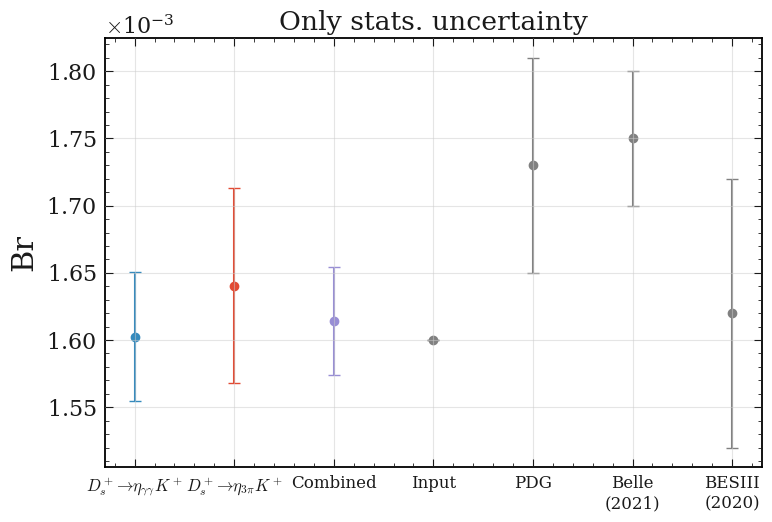

In [60]:
# Plotting
plt.errorbar(1, central_value_1, yerr=stat_unc_1, fmt='o', capsize=4)
plt.errorbar(2, central_value_2, yerr=stat_unc_2, fmt='o', capsize=4)
plt.errorbar(3, combined_central_value, yerr=combined_error, fmt='o', capsize=4)
plt.errorbar(4, Br_sig_dec, yerr=0, fmt='o', capsize=4, label='Input',color='gray')
plt.errorbar(5, Br_sig_PDG, yerr=Br_sig_PDG_err, fmt='o', capsize=4,color='gray')
plt.errorbar(6, 1.75/1000, yerr=0.05/1000, fmt='o', capsize=4,color='gray')
plt.errorbar(7, 1.62/1000, yerr=0.1/1000, fmt='o', capsize=4,color='gray')

# Customizing plot
plt.xticks([1, 2, 3, 4, 5, 6, 7], [r'$D_s^+ \to \eta_{\gamma\gamma} K^+$', r'$D_s^+ \to \eta_{3\pi} K^+$', 'Combined','Input','PDG','Belle\n(2021)','BESIII\n(2020)'], fontsize=12)
# plt.xticks([1, 2, 3, 4], [r'$D^+ \to \eta_{\gamma\gamma} K^+$', r'$D^+ \to \eta_{3\pi} K^+$', 'Combined','Input','PDG'], fontsize=12)

plt.gca().yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))

plt.ylabel('Br')
plt.grid(True, alpha=0.5)
plt.title("Only stats. uncertainty")

# plt.legend()
plt.tight_layout()
plt.savefig("MC15rd_427_87_etaKp_gg_Ds_Br.png")
plt.show()